# Importing Libraries

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Loading and Processing Data

In [2]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Using 20% of data for validation
)

train_generator = datagen.flow_from_directory(
    '/kaggle/input/pc-parts/pc_parts',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    '/kaggle/input/pc-parts/pc_parts',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2629 images belonging to 14 classes.
Found 650 images belonging to 14 classes.


# Defining ResNet50 model

In [7]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(14, activation='softmax')(x) 
model = Model(inputs=base_model.input, outputs=x)

# Compiling Model

In [8]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Training Model

In [9]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=15)

Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/83 ━━━━━━━━━━━━━━━━━━━━ 31:17 23s/step - accuracy: 0.0000e+00 - loss: 3.2501

I0000 00:00:1718077562.344242     144 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718077562.398408     144 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 561ms/step - accuracy: 0.0987 - loss: 16.6300

W0000 00:00:1718077608.423638     144 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718077614.575527     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


83/83 ━━━━━━━━━━━━━━━━━━━━ 90s 824ms/step - accuracy: 0.0989 - loss: 16.5401 - val_accuracy: 0.1308 - val_loss: 3.4294
Epoch 2/15


W0000 00:00:1718077630.080502     144 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


83/83 ━━━━━━━━━━━━━━━━━━━━ 50s 562ms/step - accuracy: 0.1837 - loss: 2.8924 - val_accuracy: 0.1754 - val_loss: 3.0794
Epoch 3/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 49s 553ms/step - accuracy: 0.1851 - loss: 2.8218 - val_accuracy: 0.2031 - val_loss: 2.7926
Epoch 4/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 49s 550ms/step - accuracy: 0.2242 - loss: 2.4907 - val_accuracy: 0.2062 - val_loss: 2.4768
Epoch 5/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 49s 551ms/step - accuracy: 0.2295 - loss: 2.5410 - val_accuracy: 0.2323 - val_loss: 2.3828
Epoch 6/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 51s 572ms/step - accuracy: 0.2311 - loss: 2.3452 - val_accuracy: 0.2108 - val_loss: 2.5822
Epoch 7/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 49s 559ms/step - accuracy: 0.2229 - loss: 2.4234 - val_accuracy: 0.1338 - val_loss: 2.5872
Epoch 8/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 49s 549ms/step - accuracy: 0.2067 - loss: 2.4463 - val_accuracy: 0.2292 - val_loss: 2.4154
Epoch 9/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 49s 556ms/step - accuracy: 0.2102 - loss: 2.3902 - val_accuracy: 0.200

# Unfreeze some layers in the base model for fine-tuning

In [10]:

base_model.trainable = True
fine_tune_at = len(base_model.layers) // 2
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Recompile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training
history_fine = model.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
64/83 ━━━━━━━━━━━━━━━━━━━━ 13s 687ms/step - accuracy: 0.1540 - loss: 4.9447

W0000 00:00:1718078430.792134     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step - accuracy: 0.1567 - loss: 4.5456

W0000 00:00:1718078442.495247     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


83/83 ━━━━━━━━━━━━━━━━━━━━ 108s 798ms/step - accuracy: 0.1568 - loss: 4.5286 - val_accuracy: 0.1215 - val_loss: 2.9381
Epoch 2/10


W0000 00:00:1718078452.916244     142 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


83/83 ━━━━━━━━━━━━━━━━━━━━ 50s 565ms/step - accuracy: 0.1978 - loss: 2.4586 - val_accuracy: 0.1600 - val_loss: 2.5471
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 51s 566ms/step - accuracy: 0.2411 - loss: 2.2809 - val_accuracy: 0.2569 - val_loss: 2.2739
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 50s 565ms/step - accuracy: 0.2641 - loss: 2.2476 - val_accuracy: 0.2800 - val_loss: 2.2384
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 50s 564ms/step - accuracy: 0.3003 - loss: 2.1189 - val_accuracy: 0.3092 - val_loss: 2.2575
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 50s 561ms/step - accuracy: 0.3312 - loss: 2.0852 - val_accuracy: 0.3354 - val_loss: 2.1363
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 51s 574ms/step - accuracy: 0.3536 - loss: 2.0468 - val_accuracy: 0.3738 - val_loss: 2.0619
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 51s 569ms/step - accuracy: 0.3668 - loss: 1.9656 - val_accuracy: 0.3954 - val_loss: 1.9744
Epoch 9/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 50s 567ms/step - accuracy: 0.4302 - loss: 1.8014 - val_accuracy: 0.384

# Model Evaluation

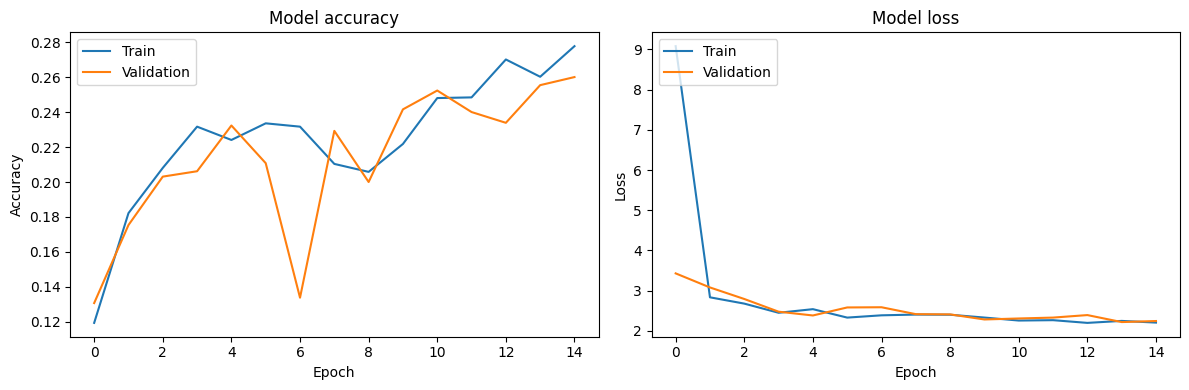

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


# Model Validation

Found 3279 images belonging to 14 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  2/103 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step

W0000 00:00:1718079017.354842     143 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


103/103 ━━━━━━━━━━━━━━━━━━━━ 60s 546ms/step


W0000 00:00:1718079073.031996     142 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


              precision    recall  f1-score   support

      cables       0.08      0.04      0.05       298
        case       0.10      0.07      0.08       282
         cpu       0.33      0.01      0.01       142
         gpu       0.03      0.03      0.03       156
         hdd       0.09      0.08      0.09       262
     headset       0.11      0.09      0.10       264
    keyboard       0.05      0.04      0.04       268
  microphone       0.09      0.09      0.09       214
     monitor       0.09      0.12      0.10       256
 motherboard       0.04      0.05      0.04       241
       mouse       0.07      0.13      0.09       210
         ram       0.06      0.11      0.07       226
    speakers       0.06      0.05      0.06       296
      webcam       0.04      0.04      0.04       164

    accuracy                           0.07      3279
   macro avg       0.09      0.07      0.07      3279
weighted avg       0.08      0.07      0.07      3279



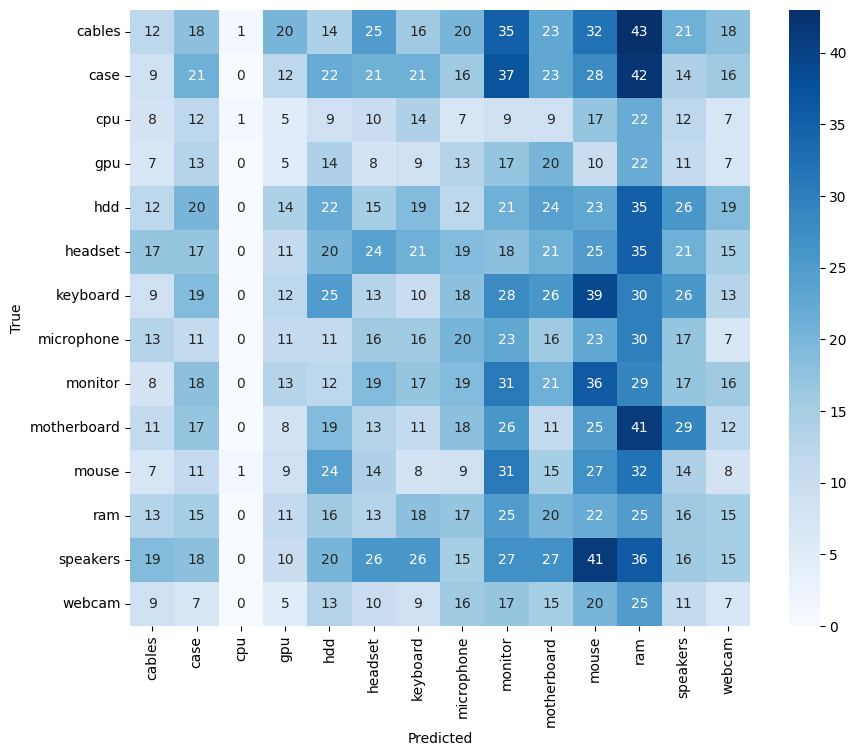

In [11]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate on the test set
test_generator = datagen.flow_from_directory(
    '/kaggle/input/pc-parts/pc_parts',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Predict the labels
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

# Classification report
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Saving Model

In [12]:
model.save('pc_parts_classification_model.h5')